### Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To make graphs plot in the notebook
%matplotlib inline

### Load Data

In [2]:
sales = pd.read_csv('Philadelphia_Crime_Rate_noNA.csv')

# See sample data
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25,8.0,Aston,Delaware
3,110490,11.0490,49.4,25,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19,3.9,Bristol B.,Bucks


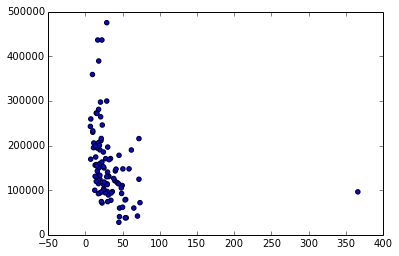

In [3]:
plt.scatter(sales.CrimeRate, sales.HousePrice)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

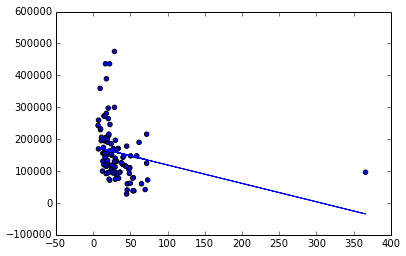

In [77]:
regr = LinearRegression()

# Prepare the data
input = sales.CrimeRate.reshape(sales.CrimeRate.shape[0], 1)
output = sales.HousePrice.reshape(sales.CrimeRate.shape[0], 1)

regr.fit(input, output)

plt.scatter(sales.CrimeRate, sales.HousePrice)
plt.plot(sales.CrimeRate, regr.predict(input))

# Remove Center City and redo the analysis

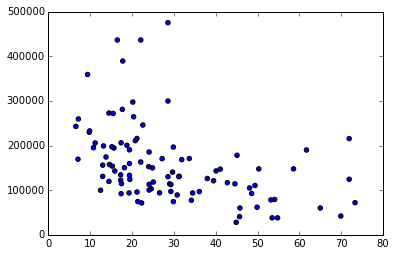

In [78]:
sales_noCC = sales[sales.MilesPhila != 0.0]
plt.scatter(sales_noCC.CrimeRate, sales_noCC.HousePrice)

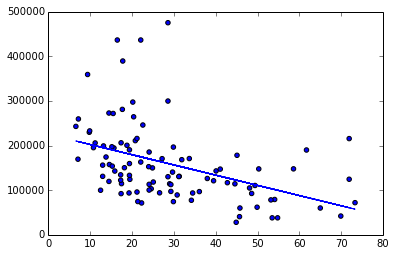

In [79]:
regr_noCC = LinearRegression()
# Prepare the data
input = sales_noCC.CrimeRate.reshape(sales_noCC.CrimeRate.shape[0], 1)
output = sales_noCC.HousePrice.reshape(sales_noCC.CrimeRate.shape[0], 1)

regr_noCC.fit(input, output)

plt.scatter(sales_noCC.CrimeRate, sales_noCC.HousePrice)
plt.plot(sales_noCC.CrimeRate, regr_noCC.predict(input))

### Coefficients for full-data vs no-Center-City data

In [80]:
print 'Full Data'
print 'Intercept:', regr.intercept_
print 'Slope:', regr.coef_

Full Data
Intercept: [ 176629.40810695]
Slope: [[-576.90812768]]


In [81]:
print 'No Center City Data'
print 'Intercept:', regr_noCC.intercept_
print 'Slope:', regr_noCC.coef_

No Center City Data
Intercept: [ 225233.551839]
Slope: [[-2288.68942995]]


### Remove high-value outlier neighborhoods and redo analysis

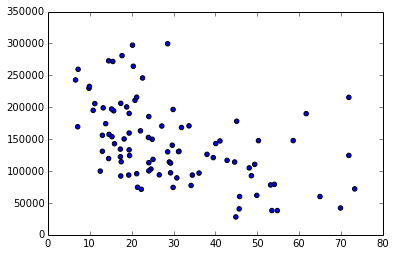

In [82]:
sales_noCC_noHighPrice = sales_noCC[sales_noCC.HousePrice < 350000]
plt.scatter(sales_noCC_noHighPrice.CrimeRate, sales_noCC_noHighPrice.HousePrice)

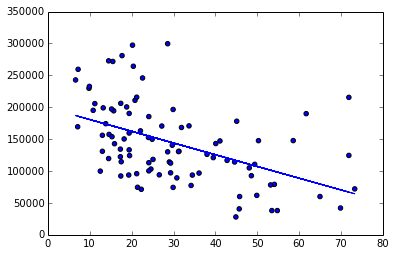

In [84]:
regr_noCC_noHighPrice = LinearRegression()
# Prepare the data
input = sales_noCC_noHighPrice.CrimeRate.reshape(sales_noCC_noHighPrice.CrimeRate.shape[0], 1)
output = sales_noCC_noHighPrice.HousePrice.reshape(sales_noCC_noHighPrice.CrimeRate.shape[0], 1)

regr_noCC_noHighPrice.fit(input, output)

plt.scatter(sales_noCC_noHighPrice.CrimeRate, sales_noCC_noHighPrice.HousePrice)
plt.plot(sales_noCC_noHighPrice.CrimeRate, regr_noCC_noHighPrice.predict(input))

## Do the coefficients change much?

In [87]:
print 'No Center City Data'
print 'Intercept:', regr_noCC.intercept_
print 'Slope:', regr_noCC.coef_

No Center City Data
Intercept: [ 225233.551839]
Slope: [[-2288.68942995]]


In [88]:
print 'No Center City and No High Price Data'
print 'Intercept:', regr_noCC_noHighPrice.intercept_
print 'Slope:', regr_noCC_noHighPrice.coef_

No Center City and No High Price Data
Intercept: [ 199098.8526698]
Slope: [[-1838.56264859]]
